# Problem Statement

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


**Business Goal:**
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


**Data Preparation:**

- You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
- You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 
 

**Model Building**

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. **The model should be built taking this 'cnt' as the target variable.**


Model Evaluation:
When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

 
```python
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
```
 

- where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.

- Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.


## Note: Evaluation Rubric For reference

- Data understanding, preparation and EDA (25%)
- Model building and evaluation (50%)
- Coding Guidelines (5%)
- Subjective Questions (20%)



## Thought Process For Linear Regression Assigment: 

1. Exporing Data For understanding or to explore data set, first step is to load the data and and analyse using :<br>
    - df.info<br>
    - df.shape<br>
    - df[listofcols].describe().T T : to transpose the data for easy visualization<br><br>
2. Cleaning the data, manipulation (or impute the data) Data cleaning and imputation includes :<br>
    - look for null data, using df.isnull().sum() : gives number of null values in all columns in df
    - use data.isnull().mean()*100 to get the feel of missing values in every column
    - Check for duplicate values using : data.duplicated.sum() / data.duplicated.any(): duplicate values will influence the final result / outcome and will add bias to the data.
    - So its very much critical to find duplicates and drop them as required. drop data using : data.drop_duplicates(subset=None, inplace=True)
    - **Note**: alternatively find unique values in each column using df.nunique() to count the number of unique values in a given axis and drop the duplicates using df.drop(same_value_cols, axis=1)
    - drop all columns which has not valid values (i.e. all null values) such columns does not add to any value for analysis.<br><br>
3. Perform EDA / Data analysis which includes:
    - Creation of pairplots which helps us in understanding numerical variables.
    - Creation of Correlation Table / Heatmap is part of bivariate analysis.
    - Correlation function/heatmap : this is similar to redundant / duplicate data, adds biases to the model and we need to give importance to correlated features and its recommended to drop highly correlated features to avoid biases to the outcome / model.
    - Heat map can help in indentifying highly correlated features. 
    - Creation of dummy variables for categorical variables. This can be achieved using multiple ways either call pd.get_dummies on each categorical variable or identify categorical variable and change the type to 'category' using astype and call pd.get_dummies on entire df !!! 
    - Multivariate Analysis : Multivariate analysis is the analysis of more than two variables. The purpose of multivariate analysis is to examine the multiple relations between multiple variables. 
    - This can be achieved using subplots using categorical variables against target variable 'cnt' to understand data better.<br><br>
4. Building Models : Linear Regression models :
    - From here onwards the data is split as test and train data, which is used to train the model
    - Rescaling the model : using MinMaxScaler.
    - Building Linear Regression model : RFE [Recursive feature elimination] is used to train the model using train data and as follow the process of RFE to recusrivers eleminate the features which does not add value to the model using R^2 and Adjusted R^2.
    - Building Linear Model using 'STATS MODEL': in this step VIF and P values are calculated and corresponding features are dropped as per Algo below ( I mean features are dropped as per steps mentioned below) :
        - High VIF, High P Value 
        - High VIF, Low P Value
        - Low VIF, High P Value        
        - Low VIF, Low P Value
<br><br>
5. Inferences, Final model interpretation     
    

## Lets start by importing necessary libraries, can be done in single shot or as and when required

In [1]:
#Import required libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

# For calculate VIF of variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  

from sklearn.preprocessing import StandardScaler


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# loading the data 
df=pd.read_csv(r"https://ml-course2-upgrad.s3.amazonaws.com/Linear+Regression+Assignment/Bike+Sharing+Assignment/day.csv")

In [3]:
# glancing at data, to understand the data for cleaning/imputing, identifying numerical and categorical vars

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
print(df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [5]:
#describe to get to know the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


In [6]:
#info to check the datatypes of all the columns
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# shape of df

print(df.shape)

(730, 16)


### Observations
- Dataset has 730 rows and 16 columns.
- From data, these columns may be categorical in nature season, weathersit, mnth, weekday.
- So may have to convert above columns to categorical, can convert to categorical using astype and generate columns using get_dummies.
- Other than Column dteday, all other are either float or integer type. Which can be dropped ?.

In [8]:
# row wise null %
null_rows = df.isnull().mean(axis=1)*100

In [9]:
null_rows

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
725    0.0
726    0.0
727    0.0
728    0.0
729    0.0
Length: 730, dtype: float64

In [10]:
#check the shape before dropping dubplicates
df.shape

(730, 16)

In [11]:
# check for duplicates, standard EDA process
if df.duplicated().any():
    df.drop_duplicates(subset=None, inplace=True)
df.shape

(730, 16)

In [12]:
#Parsing all the columns
columns = df.columns

# Creating an empty array for null columns
null_columns = []

for col in columns:
    try:
        if df[col].isnull().all() == True:
            null_columns.append(col)
    except :
        pass

# percentage of missing values in each column
null_cols = (df.isnull().mean()*100)
print(null_cols)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


#### So the rows/columns are same before and after drop_duplicates !!! , means no duplicate cols/rows were dropped.


In [13]:
#Finding columns where all entries are exactly same
same_value_cols = df.columns[df.nunique() == 1]
print(same_value_cols)

Index([], dtype='object')


In [14]:
#Check the describe once more
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


In [15]:
#now use value_counts to understand data in each of the columns / 

for eachcol in columns:
    print(f"Value counts for column {eachcol}, printing relative frequency instead of the absolute counts :")
    print(df[eachcol].value_counts(), '\n')
    print("######################################################################################### ")


Value counts for column instant, printing relative frequency instead of the absolute counts :
1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64 

######################################################################################### 
Value counts for column dteday, printing relative frequency instead of the absolute counts :
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 

######################################################################################### 
Value counts for column season, printing relative frequency instead of the absolute counts :
3    188
2    184
1    180
4    178
Name: season, dtype: int64 

######################################################################################### 
Value counts for colum

#### From above value_count (relative or absolute) looks like df does not have any junk values.

## Proceeding to cleaning part of, dropping unwanted columns which represents duplicate data

We can exclude some variables from our analysis based on the dictionary that comes with the data set:

- instant : This is just a record index and does not have any meaning for our analysis.

- dteday : This contains the date, but we already have separate columns for 'year' and 'month', so we do not need this column.

- casual and registered : These columns show the number of bikes rented by different types of customers. However, our goal is to find the total number of bikes rented, not by specific categories, so we can ignore these columns. Besides, we can created a new variable to capture the ratio of these customer types. Note : casual+registered=cnt and cnt is our target variable so we will not consider casual and registered.

In [16]:
to_dropcolumns = ['instant', 'dteday', 'casual', 'registered']

In [17]:
#can rename few of the columns, for better readibility
#df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)


In [18]:
df_subset = df.drop(to_dropcolumns, axis=1)

In [19]:
df_subset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
df_subset.shape

(730, 12)

In [21]:
#check for datatypes
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [22]:

# remap few of the categorial columns as per dictionary.
df_subset['season'].replace({1:"Spring",2:"Summer",3:"Fall",4:"Winter"},inplace=True)
df_subset['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace=True)
df_subset['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
df_subset['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)

df_subset.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,Spring,0,Jan,0,Thursday,1,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,Spring,0,Jan,0,Friday,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,Spring,0,Jan,0,Saturday,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,Spring,0,Jan,0,Sunday,0,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,Spring,0,Jan,0,Monday,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [23]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Visualising Variables of df_subset : Univariate Analysis

Let's now spend some time doing what is arguably the most important step - understanding the data.


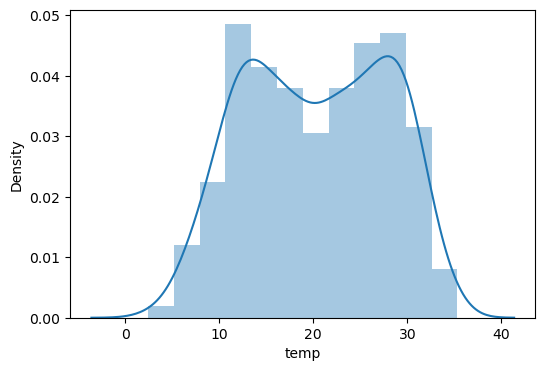

In [24]:
# temperature analysis
plt.figure(figsize=(6, 4)) 
sns.distplot(df_subset['temp'])
plt.show()

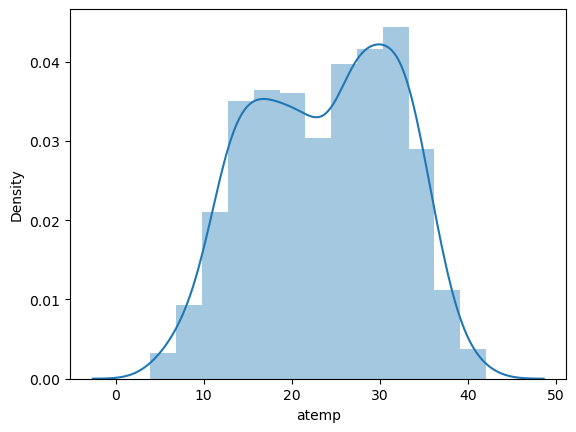

In [25]:
# feeling temperature analysis
sns.distplot(df_subset['atemp'])
plt.show()

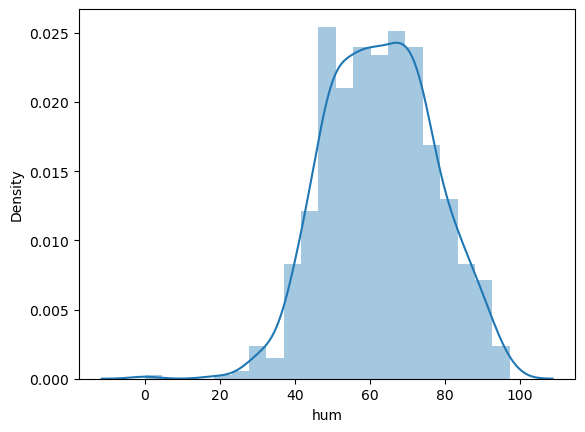

In [26]:
# humidity analysis
sns.distplot(df_subset['hum'])
plt.show()

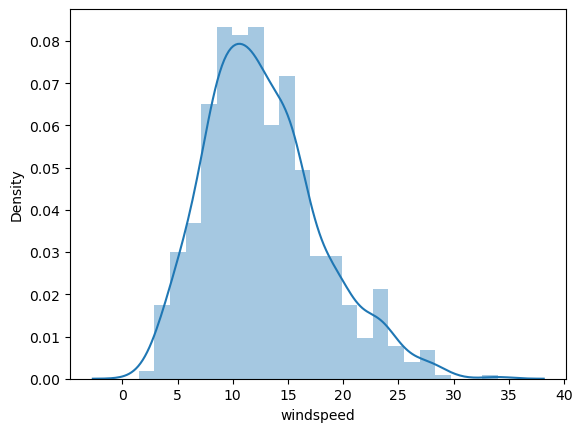

In [27]:
# wind speed analysis
sns.distplot(df_subset['windspeed'])
plt.show()

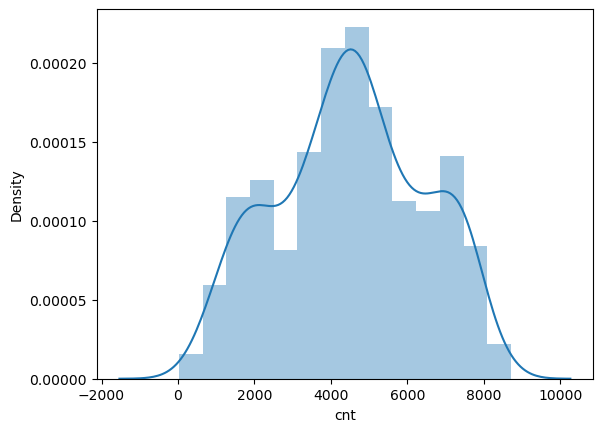

In [28]:
# Target variable: analysis : count of total rental bikes including both casual and registered
sns.distplot(df_subset['cnt'])
plt.show()

### Visualising Numeric Variables of df_subset

Let's now spend some time doing what is arguably the most important step - understanding the data.

- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using matplotlib and seaborn.

Note :
Now we have 2 choices ,we can perfrom EDA on the df_subset or split the data into train and test set and perform EDA on train data set.

Lets perform EDA on df_subset instead of splitting data here and Let's make a pairplot of all the numeric variables


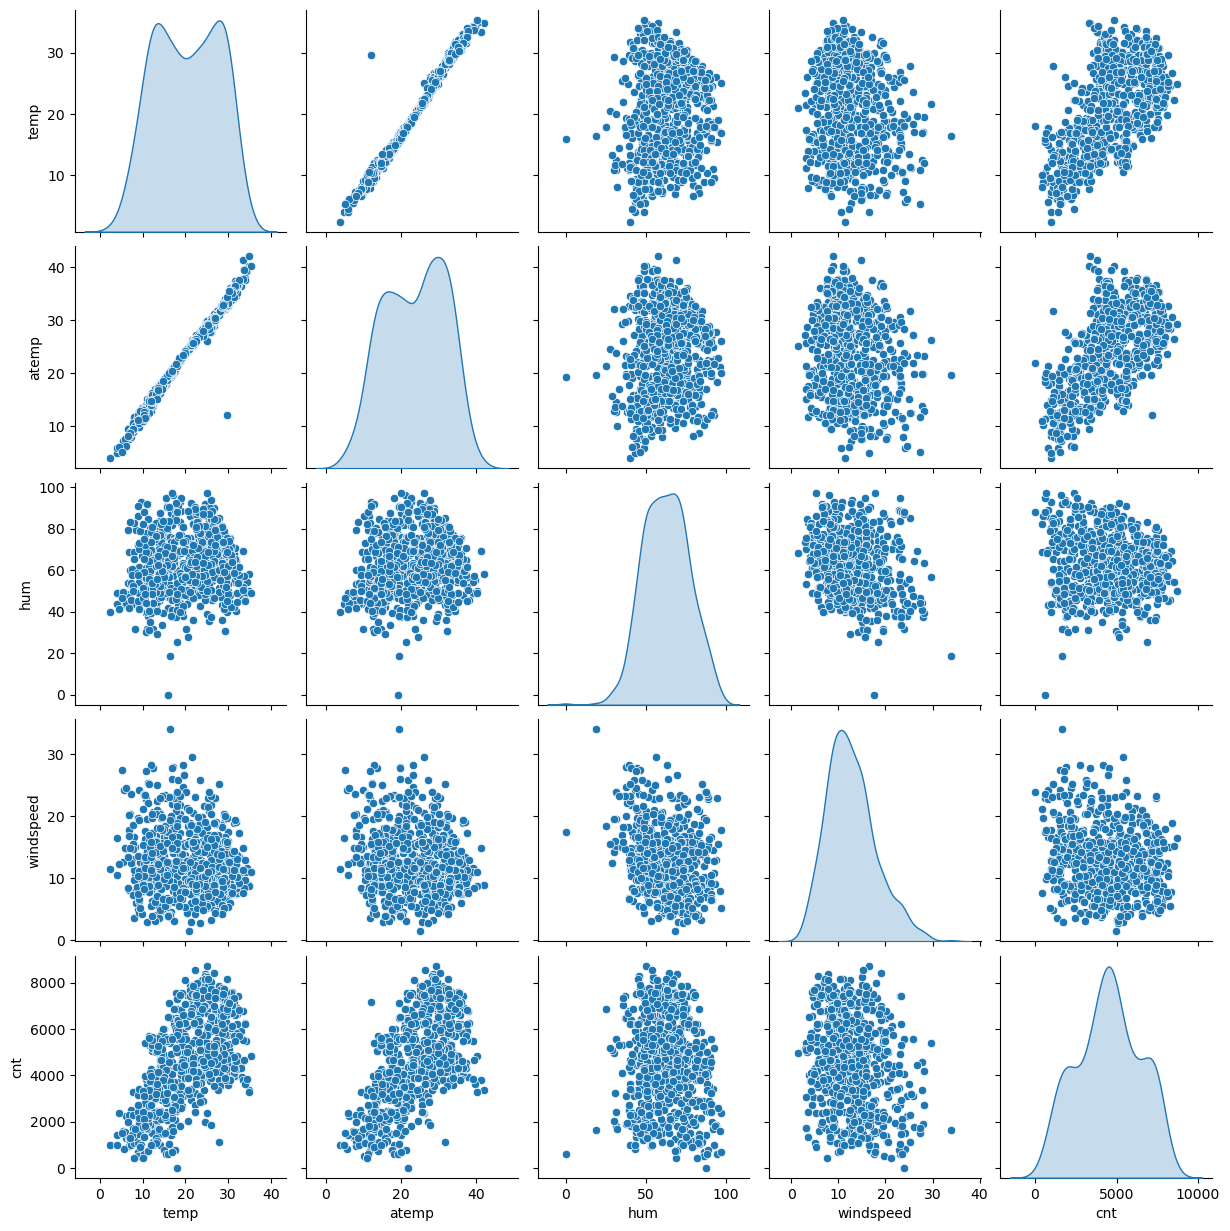

In [29]:
numerical_vars=['temp', 'atemp', 'hum', 'windspeed','cnt']

#sns.pairplot(data=df_subset, vars=numerical_vars) #diag as bar chart

# The diag_kind='kde' parameter tells the pairplot() function to use a kernel density estimate (KDE) 
# plot for the diagonal subplots of the grid
sns.pairplot(data=df_subset, vars=numerical_vars, diag_kind='kde')
plt.show()

The Pair-Plot graphs show that there is a linear relationship between temp, atemp and cnt (target var).

### Visualising Categorical Variables

Earlier we saw data set had a few categorical variables as well. Let's make a boxplot for some of these variables.

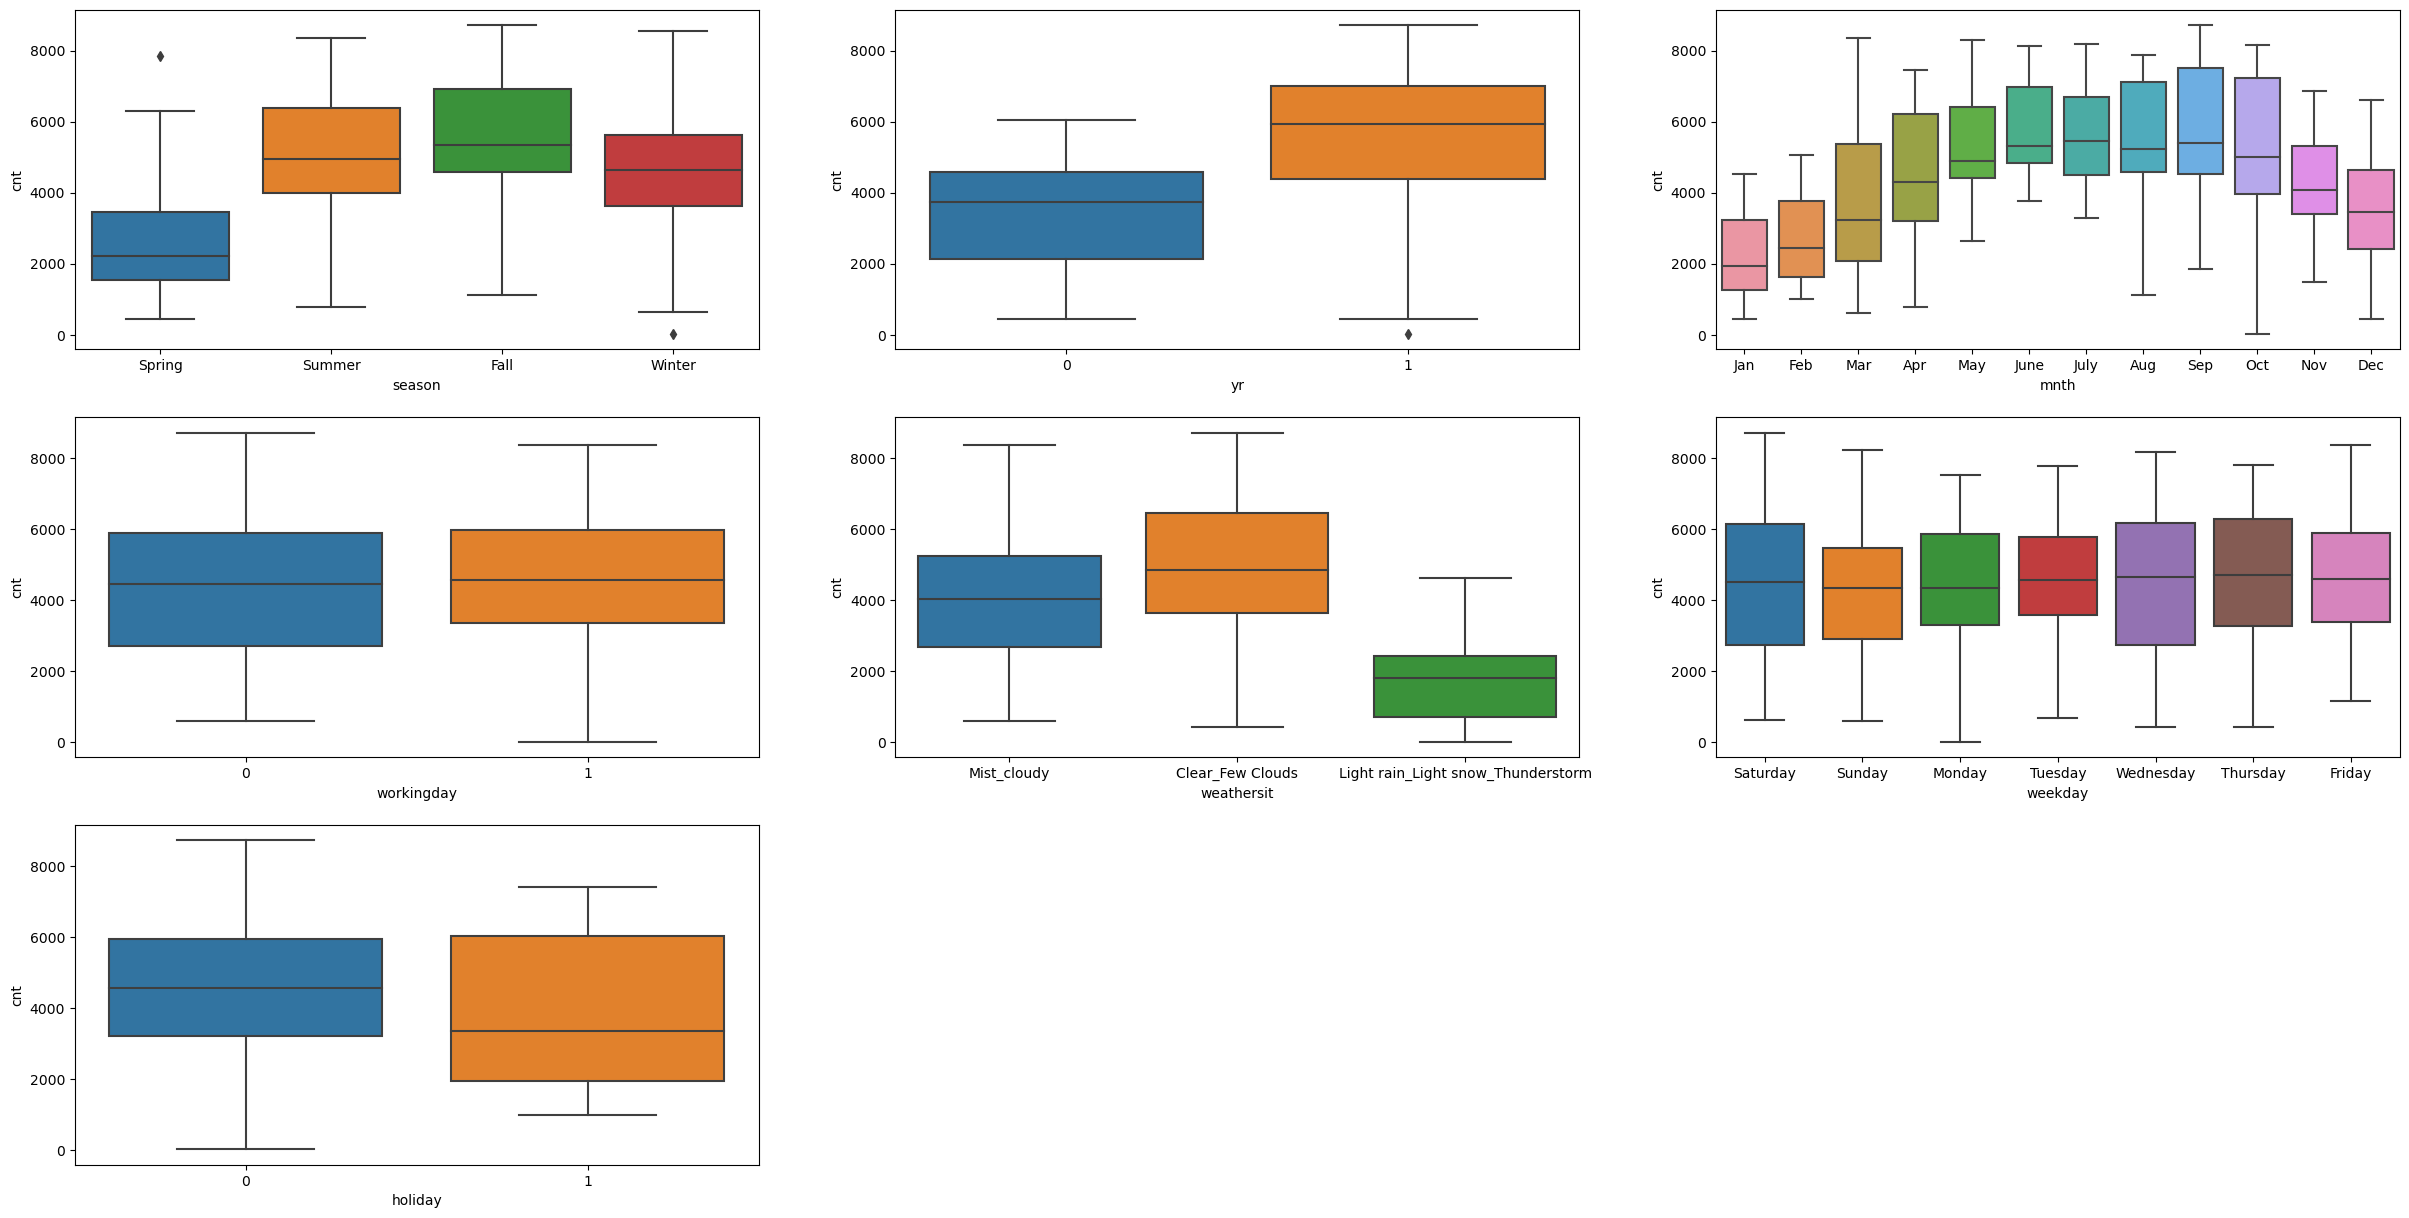

In [30]:
categorical_vars=['season', 'yr', 'mnth', 'weathersit', 'holiday', 'weekday', 'workingday']

#Visualising categorical Variables to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_subset)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df_subset)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_subset)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_subset)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_subset)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_subset)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_subset)
plt.show()

### Visualising Categorical Variables : Multivariate Analysis

################################################################


<Axes: xlabel='season', ylabel='cnt'>

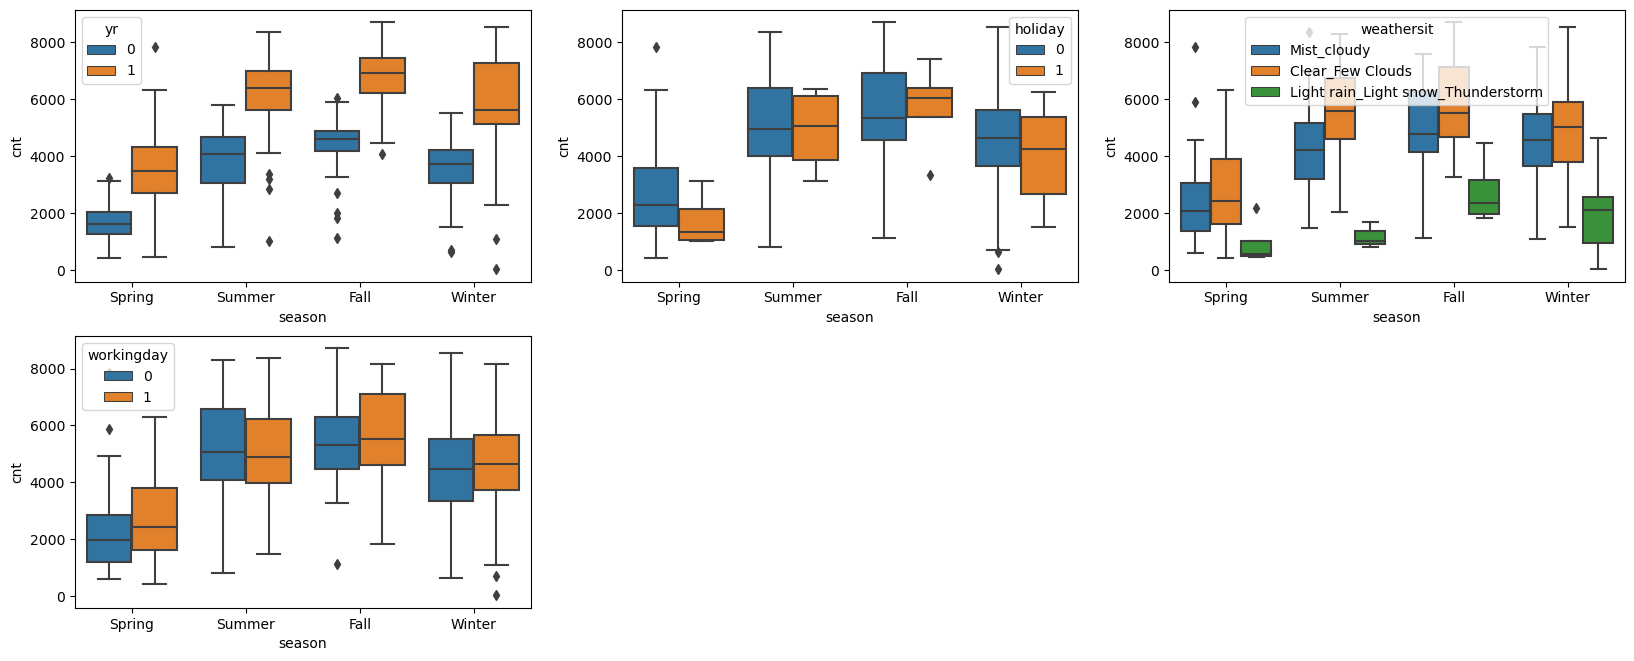

In [31]:
print("################################################################")
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', hue = 'yr', data = df_subset)

plt.subplot(3,3,2)
sns.boxplot(x = 'season', y = 'cnt', hue = 'holiday', data = df_subset)

plt.subplot(3,3,3)
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = df_subset)

plt.subplot(3,3,4)
sns.boxplot(x = 'season', y = 'cnt', hue = 'workingday', data = df_subset)

### From above box plots we can see that 
- demand for bikes, increases over the years in all seasons
- demand for bikes, during holidays is more during summer and fall
- demand for bikes, is more when sky is clear / with few clouds, during summer and fall.
- demand for bikes, is more on working days , during summer and fall.

### Let's check the correlation coefficients to see which variables are highly correlated


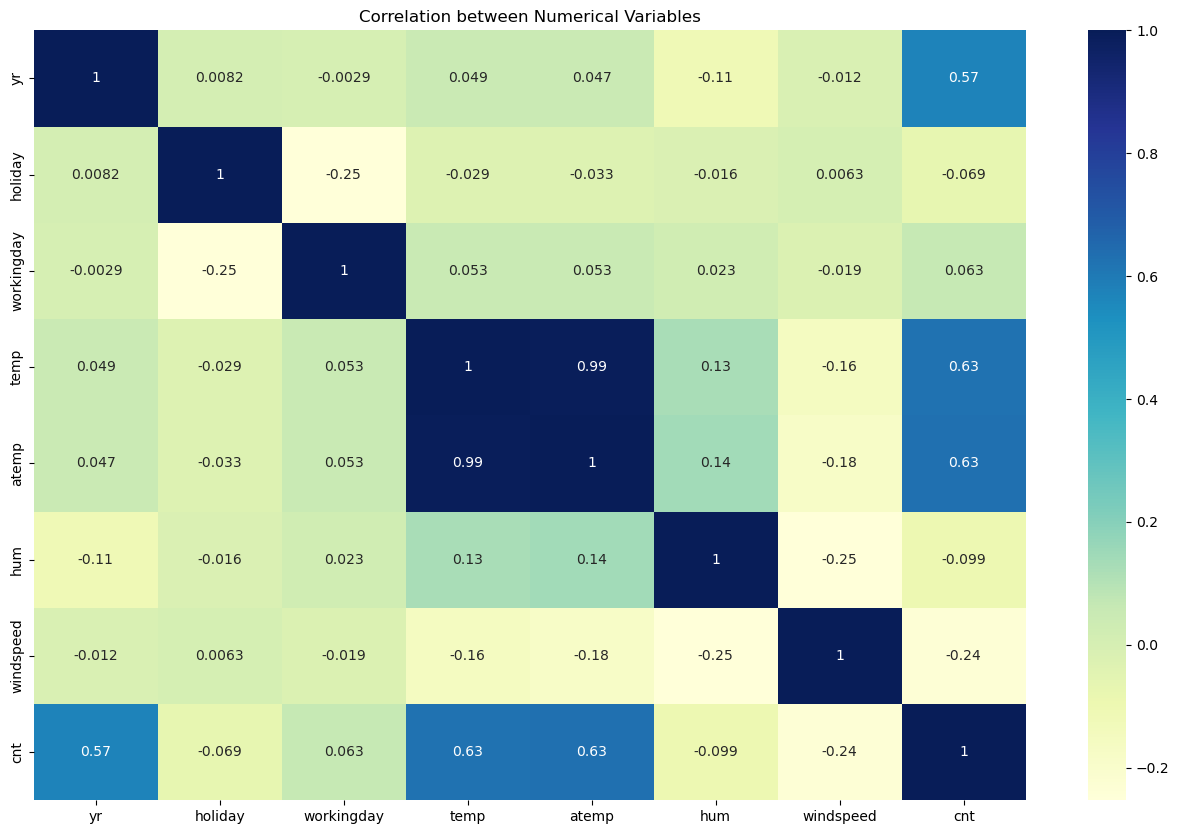

In [32]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_subset.corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation between Numerical Variables")
plt.show()

In [33]:
print(df_subset.corr())

                  yr   holiday  workingday      temp     atemp       hum  \
yr          1.000000  0.008195   -0.002945  0.048789  0.047215 -0.112547   
holiday     0.008195  1.000000   -0.252948 -0.028764 -0.032703 -0.015662   
workingday -0.002945 -0.252948    1.000000  0.053470  0.052940  0.023202   
temp        0.048789 -0.028764    0.053470  1.000000  0.991696  0.128565   
atemp       0.047215 -0.032703    0.052940  0.991696  1.000000  0.141512   
hum        -0.112547 -0.015662    0.023202  0.128565  0.141512  1.000000   
windspeed  -0.011624  0.006257   -0.018666 -0.158186 -0.183876 -0.248506   
cnt         0.569728 -0.068764    0.062542  0.627044  0.630685 -0.098543   

            windspeed       cnt  
yr          -0.011624  0.569728  
holiday      0.006257 -0.068764  
workingday  -0.018666  0.062542  
temp        -0.158186  0.627044  
atemp       -0.183876  0.630685  
hum         -0.248506 -0.098543  
windspeed    1.000000 -0.235132  
cnt         -0.235132  1.000000  


### Correlation between temp and atemp is 0.99 which is almost 1.

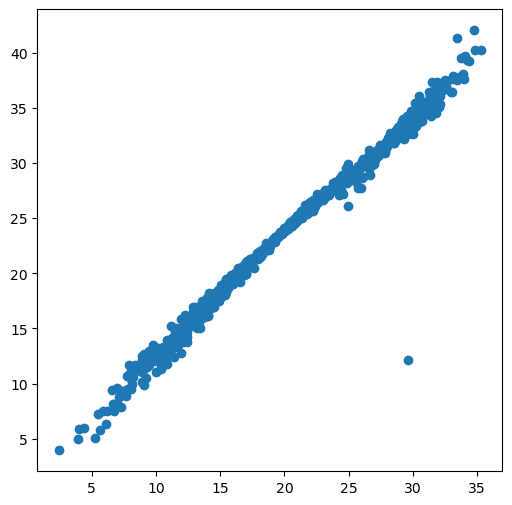

In [34]:
plt.figure(figsize=[6,6])
plt.scatter(df_subset.temp, df_subset.atemp)
plt.show()

In [35]:
#correlation between temp and atemp is 0.99 which is almost 1
#Let us drop temp and consider atemp
df_subset.drop(['temp'],axis=1,inplace=True)
df_subset.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


In [36]:
# Convert to 'category' data type

df_subset['season']=df_subset['season'].astype('category')
df_subset['weathersit']=df_subset['weathersit'].astype('category')
df_subset['mnth']=df_subset['mnth'].astype('category')
df_subset['weekday']=df_subset['weekday'].astype('category')

In [37]:
# Now since the vars are being tagged as categorical, create dummy vars for these categorical vars and 
# simultaneously drop the first dummy vars for each of these variables.

df_subset = pd.get_dummies(df_subset, drop_first=True)
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   yr                                             730 non-null    int64  
 1   holiday                                        730 non-null    int64  
 2   workingday                                     730 non-null    int64  
 3   atemp                                          730 non-null    float64
 4   hum                                            730 non-null    float64
 5   windspeed                                      730 non-null    float64
 6   cnt                                            730 non-null    int64  
 7   season_Spring                                  730 non-null    uint8  
 8   season_Summer                                  730 non-null    uint8  
 9   season_Winter                                  730 non

### Now its time to split the data, Step toward building model

In [38]:
#Now are data is ready to split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_subset, train_size = 0.7, test_size = 0.3, random_state = 100)

In [39]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [40]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.000000,0.000000,1.000000,1.000000,1.000000
holiday,510.0,0.025490,0.157763,0.000000,0.000000,0.000000,0.000000,1.000000
workingday,510.0,0.676471,0.468282,0.000000,0.000000,1.000000,1.000000,1.000000
atemp,510.0,23.493909,8.090038,3.953480,16.603063,24.020400,30.177700,42.044800
hum,510.0,63.112926,14.156632,0.000000,52.270825,63.437500,73.250025,97.041700
windspeed,510.0,12.831318,5.291832,2.834381,9.041918,12.083182,15.750879,34.000021
cnt,510.0,4486.382353,1952.158739,22.000000,3120.000000,4530.000000,5973.500000,8714.000000
season_Spring,510.0,0.243137,0.429398,0.000000,0.000000,0.000000,0.000000,1.000000
season_Summer,510.0,0.245098,0.430568,0.000000,0.000000,0.000000,0.000000,1.000000
season_Winter,510.0,0.249020,0.432870,0.000000,0.000000,0.000000,0.000000,1.000000


In [41]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,219.0,0.479452,0.500722,0.000000,0.000000,0.00000,1.000000,1.000000
holiday,219.0,0.036530,0.188034,0.000000,0.000000,0.00000,0.000000,1.000000
workingday,219.0,0.698630,0.459904,0.000000,0.000000,1.00000,1.000000,1.000000
atemp,219.0,24.255828,8.299641,4.941955,17.085500,24.87315,31.155725,41.318550
hum,219.0,61.961883,14.456669,25.416700,51.166700,60.91670,72.192050,97.250000
windspeed,219.0,12.600130,4.984858,1.500244,9.021282,12.16720,15.395629,27.999836
cnt,219.0,4546.981735,1898.633630,441.000000,3303.500000,4579.00000,5869.500000,8395.000000
season_Spring,219.0,0.255708,0.437258,0.000000,0.000000,0.00000,1.000000,1.000000
season_Summer,219.0,0.264840,0.442259,0.000000,0.000000,0.00000,1.000000,1.000000
season_Winter,219.0,0.232877,0.423633,0.000000,0.000000,0.00000,0.000000,1.000000


In [43]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')

## Rescaling the Features

There are two common ways of rescaling:

- Min-Max scaling
- Standardisation (mean-0, sigma-1) <br>
So lets use use MinMax scaling.

In [44]:
#scaler=MinMaxScaler()
scaler = StandardScaler()

In [45]:
num_vars=['atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [46]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,5.078431e-01,0.500429,0.000000,0.000000,1.000000,1.000000,1.000000
holiday,510.0,2.549020e-02,0.157763,0.000000,0.000000,0.000000,0.000000,1.000000
workingday,510.0,6.764706e-01,0.468282,0.000000,0.000000,1.000000,1.000000,1.000000
atemp,510.0,4.231909e-16,1.000982,-2.417741,-0.852606,0.065143,0.826987,2.295305
hum,510.0,-3.831358e-16,1.000982,-4.462565,-0.766619,0.022950,0.716770,2.399023
windspeed,510.0,-2.263984e-16,1.000982,-1.890981,-0.716788,-0.141514,0.552253,4.004188
cnt,510.0,-5.224579e-17,1.000982,-2.289141,-0.700621,0.022365,0.762529,2.167738
season_Spring,510.0,2.431373e-01,0.429398,0.000000,0.000000,0.000000,0.000000,1.000000
season_Summer,510.0,2.450980e-01,0.430568,0.000000,0.000000,0.000000,0.000000,1.000000
season_Winter,510.0,2.490196e-01,0.432870,0.000000,0.000000,0.000000,0.000000,1.000000


In [47]:
#creating X_train AND y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [48]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
653,1,0,1,-0.055878,-0.514725,-0.117752,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,1.194106,0.516433,-0.330615,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,-0.348834,-0.069854,-0.385694,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,-1.473492,-1.045032,2.018143,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,-0.571474,-1.000840,-0.779889,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [49]:
y_train.head()

653    1.562685
576    1.399629
426   -0.215554
728   -1.379511
482   -0.136589
Name: cnt, dtype: float64

### USING RFE APPROACH FOR FEATURE SELECTION
### WE START WITH 15 VARS AND WILL USE MIXED APPROACH TO BUILD A MODEL

In [50]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [51]:
# Printing coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 1.04369573 -0.19652081  0.15921673  0.39669569 -0.09457655 -0.12745233
 -0.24537215  0.13735851  0.44473971  0.16442986 -0.24079628 -0.18045942
 -0.3272243  -0.08967331  0.079431   -0.00283556  0.15977353 -0.21238778
  0.03474367  0.40767513 -0.11732878  0.14053745 -0.10323337 -0.05883529
 -0.09874632 -0.03615353 -1.13450201 -0.279024  ]
-0.5353882286330726


In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', False, 6),
 ('windspeed', False, 2),
 ('season_Spring', True, 1),
 ('season_Summer', False, 4),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 5),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 7),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 3),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 8),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light rain_Light snow_Thunderstorm', True, 1),
 ('weathersit_Mist_cloudy', True, 1)]

In [53]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July',
       'mnth_Nov', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')

In [54]:
X_train.columns[~rfe.support_]


Index(['hum', 'windspeed', 'season_Summer', 'mnth_Aug', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [55]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### BUILDING/UPDATING MODEL USING STATSMODEL:

### Model building iterations

In [56]:
def update_ols_model(y,X) : 
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model, X_train_sm

def checkVIF(X_rfe) : 
    vif = pd.DataFrame()
    X = X_rfe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
    

In [57]:
lm0, X_train_rfe0 = update_ols_model(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     164.2
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          7.66e-181
Time:                        18:02:21   Log-Likelihood:                -267.42
No. Observations:                 510   AIC:                             566.8
Df Residuals:                     494   BIC:                             634.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

### Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $


There is no definitive rule for choosing a VIF threshold to drop variables, but some common values are 10, 5, or 2.5. The higher the VIF, the more severe the multicollinearity. A VIF of 1 means that there is no multicollinearity at all. The choice of VIF threshold depends on the context and purpose of the analysis, as well as the sample size and the number of variables.

What is an Acceptable Value for VIF? (With online references), which suggests that a VIF > 10 is problematic, but also considers a more conservative threshold of 5 or even 2.5 depending on the sample size.

In [58]:
vif = checkVIF(X_train_rfe)
vif

,Features,VIF
4,season_Spring,4.09
3,atemp,2.99
2,workingday,2.81
5,season_Winter,2.70
8,mnth_Jan,2.41
7,mnth_Feb,1.95
0,yr,1.89
10,mnth_Nov,1.89
6,mnth_Dec,1.67
14,weathersit_Mist_cloudy,1.52


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

So with this approach (StandardScaler), we do not see any VIF > 5 which is great .... lets check P Values and drop them

### Model 1. Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `holiday` as it has a very high p value. Let's go ahead and drop this variables

In [59]:
X_train_rfe=X_train_rfe.drop(['holiday'],axis=1)

In [60]:
lm1, X_train_rfe1 = update_ols_model(y_train,X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          2.08e-181
Time:                        18:02:21   Log-Likelihood:                -268.77
No. Observations:                 510   AIC:                             567.5
Df Residuals:                     495   BIC:                             631.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [61]:
#Again Calculate VIF 
vif = checkVIF(X_train_rfe)
vif

,Features,VIF
3,season_Spring,4.04
2,atemp,2.96
1,workingday,2.68
4,season_Winter,2.68
7,mnth_Jan,2.40
6,mnth_Feb,1.94
0,yr,1.88
9,mnth_Nov,1.84
5,mnth_Dec,1.66
13,weathersit_Mist_cloudy,1.52


### Model 2. Updating the Model

As you can see from the summary and the VIF dataframe,all variables are with in safe VIF of 5. So we need not drop based on VIF now. Lets see the regression results summary once.

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, mnth_Feb as it has a very high P Values. Let's go ahead and drop this variables


In [62]:
X_train_rfe=X_train_rfe.drop(['mnth_Feb'],axis=1)
lm2, X_train_rfe2 = update_ols_model(y_train,X_train_rfe)
vif = checkVIF(X_train_rfe)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     187.7
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          6.05e-182
Time:                        18:02:22   Log-Likelihood:                -270.22
No. Observations:                 510   AIC:                             568.4
Df Residuals:                     496   BIC:                             627.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

,Features,VIF
3,season_Spring,2.95
2,atemp,2.84
1,workingday,2.68
4,season_Winter,2.67
0,yr,1.87
8,mnth_Nov,1.82
6,mnth_Jan,1.74
5,mnth_Dec,1.54
12,weathersit_Mist_cloudy,1.52
10,weekday_Saturday,1.38


### Model 3. Dropping the Variable and Updating the Model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, mnth_Jan as it has a very high P Values. Let's go ahead and drop this variables

In [63]:
X_train_rfe=X_train_rfe.drop(['mnth_Jan'],axis=1)

In [64]:
lm3, X_train_rfe3 = update_ols_model(y_train,X_train_rfe)
vif = checkVIF(X_train_rfe)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.3
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          4.88e-182
Time:                        18:02:22   Log-Likelihood:                -272.76
No. Observations:                 510   AIC:                             571.5
Df Residuals:                     497   BIC:                             626.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

,Features,VIF
3,season_Spring,2.68
4,season_Winter,2.67
1,workingday,2.66
2,atemp,2.64
0,yr,1.87
7,mnth_Nov,1.80
11,weathersit_Mist_cloudy,1.52
5,mnth_Dec,1.47
9,weekday_Saturday,1.38
6,mnth_July,1.35


### Model 4. Dropping the Variable and Updating the Model
As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, mnth_Nov as it has a very high P Values. Let's go ahead and drop this variables

In [65]:
X_train_rfe=X_train_rfe.drop(['mnth_Dec'],axis=1)

In [66]:
lm4, X_train_rfe4= update_ols_model(y_train,X_train_rfe) 
vif = checkVIF(X_train_rfe)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.6
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          3.05e-182
Time:                        18:02:22   Log-Likelihood:                -275.08
No. Observations:                 510   AIC:                             574.2
Df Residuals:                     498   BIC:                             625.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

,Features,VIF
3,season_Spring,2.68
1,workingday,2.64
2,atemp,2.55
4,season_Winter,2.22
0,yr,1.87
6,mnth_Nov,1.57
10,weathersit_Mist_cloudy,1.52
8,weekday_Saturday,1.37
5,mnth_July,1.35
7,mnth_Sep,1.17


### Model 5. Dropping the Variable and Updating the Model
As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, mnth_Nov as it has a very high P Values. Let's go ahead and drop this variables

In [67]:
X_train_rfe=X_train_rfe.drop(['mnth_Nov'],axis=1)

In [68]:
lm5, X_train_rfe5= update_ols_model(y_train,X_train_rfe) 
vif = checkVIF(X_train_rfe)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.7
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          1.30e-182
Time:                        18:02:22   Log-Likelihood:                -277.04
No. Observations:                 510   AIC:                             576.1
Df Residuals:                     499   BIC:                             622.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

,Features,VIF
3,season_Spring,2.67
1,workingday,2.64
2,atemp,2.52
0,yr,1.87
4,season_Winter,1.75
9,weathersit_Mist_cloudy,1.52
7,weekday_Saturday,1.37
5,mnth_July,1.34
6,mnth_Sep,1.17
8,weathersit_Light rain_Light snow_Thunderstorm,1.07


### Model 6. Now that we have a good model based on p and vif values, lets try to add new vars and see if we are able to build better model



In [69]:
X_train_rfe['weekday_Sunday']=X_train['weekday_Sunday']
X_train_rfe.head()

,yr,workingday,atemp,season_Spring,season_Winter,mnth_July,mnth_Sep,weekday_Saturday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,weekday_Sunday
653,1,1,-0.055878,0,1,0,0,0,0,0,0
576,1,1,1.194106,0,0,1,0,0,0,0,0
426,1,0,-0.348834,1,0,0,0,1,0,1,0
728,1,0,-1.473492,1,0,0,0,0,0,0,1
482,1,0,-0.571474,0,0,0,0,1,0,1,0


In [70]:
lm6, X_train_rfe6= update_ols_model(y_train,X_train_rfe) 
vif = checkVIF(X_train_rfe)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.7
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          2.99e-182
Time:                        18:02:22   Log-Likelihood:                -275.05
No. Observations:                 510   AIC:                             574.1
Df Residuals:                     498   BIC:                             624.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

,Features,VIF
1,workingday,3.46
3,season_Spring,3.09
2,atemp,2.65
0,yr,2.03
4,season_Winter,2.03
9,weathersit_Mist_cloudy,1.58
7,weekday_Saturday,1.56
10,weekday_Sunday,1.52
5,mnth_July,1.37
6,mnth_Sep,1.17


In [71]:
# Sunday has high p value so not considering it
X_train_rfe=X_train_rfe.drop(['weekday_Sunday'],axis=1)

### Model 7. Lets Add mnth_Oct back to the train data set to check if model improves


In [72]:
X_train_rfe['mnth_Oct']=X_train['mnth_Oct']

lm7, X_train_rfe7 = update_ols_model(y_train,X_train_rfe) 
vif = checkVIF(X_train_rfe)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.8
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          2.61e-182
Time:                        18:02:22   Log-Likelihood:                -274.92
No. Observations:                 510   AIC:                             573.8
Df Residuals:                     498   BIC:                             624.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

,Features,VIF
3,season_Spring,2.73
2,atemp,2.67
1,workingday,2.65
4,season_Winter,2.53
0,yr,1.87
10,mnth_Oct,1.66
9,weathersit_Mist_cloudy,1.52
7,weekday_Saturday,1.37
5,mnth_July,1.36
6,mnth_Sep,1.19


##### Note: mnth_Oct did not help in improving the model dropping the same

In [73]:
X_train_rfe=X_train_rfe.drop(['mnth_Oct'],axis=1)

### Model 8. Lets Add weekday_Monday back to the train data set to check if model improves


In [74]:
X_train_rfe['weekday_Monday']=X_train['weekday_Monday']


lm8, X_train_rfe8 = update_ols_model(y_train,X_train_rfe)
vif = checkVIF(X_train_rfe)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.5
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          3.42e-182
Time:                        18:02:22   Log-Likelihood:                -275.19
No. Observations:                 510   AIC:                             574.4
Df Residuals:                     498   BIC:                             625.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

,Features,VIF
1,workingday,2.74
3,season_Spring,2.67
2,atemp,2.52
0,yr,1.88
4,season_Winter,1.76
9,weathersit_Mist_cloudy,1.52
7,weekday_Saturday,1.38
5,mnth_July,1.34
10,weekday_Monday,1.22
6,mnth_Sep,1.17


#### dropping weekay_Monday as it has high p value

In [75]:
X_train_rfe=X_train_rfe.drop(['weekday_Monday'],axis=1)

### Model 9. Lets Add weekday_Wednesday  back to the train data set to check if model improves


In [76]:
X_train_rfe['weekday_Wednesday']=X_train['weekday_Wednesday']


lm9, X_train_rfe9 = update_ols_model(y_train,X_train_rfe)
vif = checkVIF(X_train_rfe)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.9
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          1.65e-181
Time:                        18:02:22   Log-Likelihood:                -276.81
No. Observations:                 510   AIC:                             577.6
Df Residuals:                     498   BIC:                             628.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

,Features,VIF
1,workingday,2.94
3,season_Spring,2.67
2,atemp,2.53
0,yr,1.87
4,season_Winter,1.75
9,weathersit_Mist_cloudy,1.52
7,weekday_Saturday,1.37
5,mnth_July,1.35
10,weekday_Wednesday,1.32
6,mnth_Sep,1.17


#### dropping weekay_Monday as it has high p value

In [77]:
X_train_rfe=X_train_rfe.drop(['weekday_Wednesday'],axis=1)

### Model 10. Lets Add weekday_Tuesday  back to the train data set to check if model improves

In [78]:
X_train_rfe['weekday_Tuesday']=X_train['weekday_Tuesday']

lm10, X_train_rfe10 = update_ols_model(y_train,X_train_rfe)
vif = checkVIF(X_train_rfe)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.0
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          1.50e-181
Time:                        18:02:22   Log-Likelihood:                -276.71
No. Observations:                 510   AIC:                             577.4
Df Residuals:                     498   BIC:                             628.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

,Features,VIF
1,workingday,2.89
3,season_Spring,2.67
2,atemp,2.52
0,yr,1.87
4,season_Winter,1.75
9,weathersit_Mist_cloudy,1.52
7,weekday_Saturday,1.37
5,mnth_July,1.35
10,weekday_Tuesday,1.25
6,mnth_Sep,1.17


#### dropping weekday_Tuesday as it has high p value

In [79]:
X_train_rfe=X_train_rfe.drop(['weekday_Tuesday'],axis=1)

### Model 11. Lets Add weekday_Thursday  back to the train data set to check if model improves

In [80]:
X_train_rfe['weekday_Thursday']=X_train['weekday_Thursday']
X_train_rfe.head()

lm11, X_train_rfe11 = update_ols_model(y_train,X_train_rfe)
vif = checkVIF(X_train_rfe)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.7
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          2.00e-181
Time:                        18:02:22   Log-Likelihood:                -277.01
No. Observations:                 510   AIC:                             578.0
Df Residuals:                     498   BIC:                             628.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

,Features,VIF
1,workingday,2.87
3,season_Spring,2.67
2,atemp,2.52
0,yr,1.87
4,season_Winter,1.75
9,weathersit_Mist_cloudy,1.52
7,weekday_Saturday,1.37
5,mnth_July,1.34
10,weekday_Thursday,1.24
6,mnth_Sep,1.17


#### dropping weekday_Thursday as it has high p value

In [81]:
X_train_rfe=X_train_rfe.drop(['weekday_Thursday'],axis=1)

### Overall we have a decent model now.

Just renaming final model vars

In [82]:

lm_final, X_train_rfe_final = update_ols_model(y_train,X_train_rfe) 
vif = checkVIF(X_train_rfe)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.7
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          1.30e-182
Time:                        18:02:22   Log-Likelihood:                -277.04
No. Observations:                 510   AIC:                             576.1
Df Residuals:                     499   BIC:                             622.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

,Features,VIF
3,season_Spring,2.67
1,workingday,2.64
2,atemp,2.52
0,yr,1.87
4,season_Winter,1.75
9,weathersit_Mist_cloudy,1.52
7,weekday_Saturday,1.37
5,mnth_July,1.34
6,mnth_Sep,1.17
8,weathersit_Light rain_Light snow_Thunderstorm,1.07


### We have considered all columns and checked. Now we can stop the model building and check on which model can we choose

### Out all the models model lm_final (lm6) seems to give good result so we can choose it for predictions.

In [83]:
#Predict values
y_train_cnt = lm_final.predict(X_train_rfe_final)

#### Residual Analysis¶


In [84]:
res=y_train - y_train_cnt

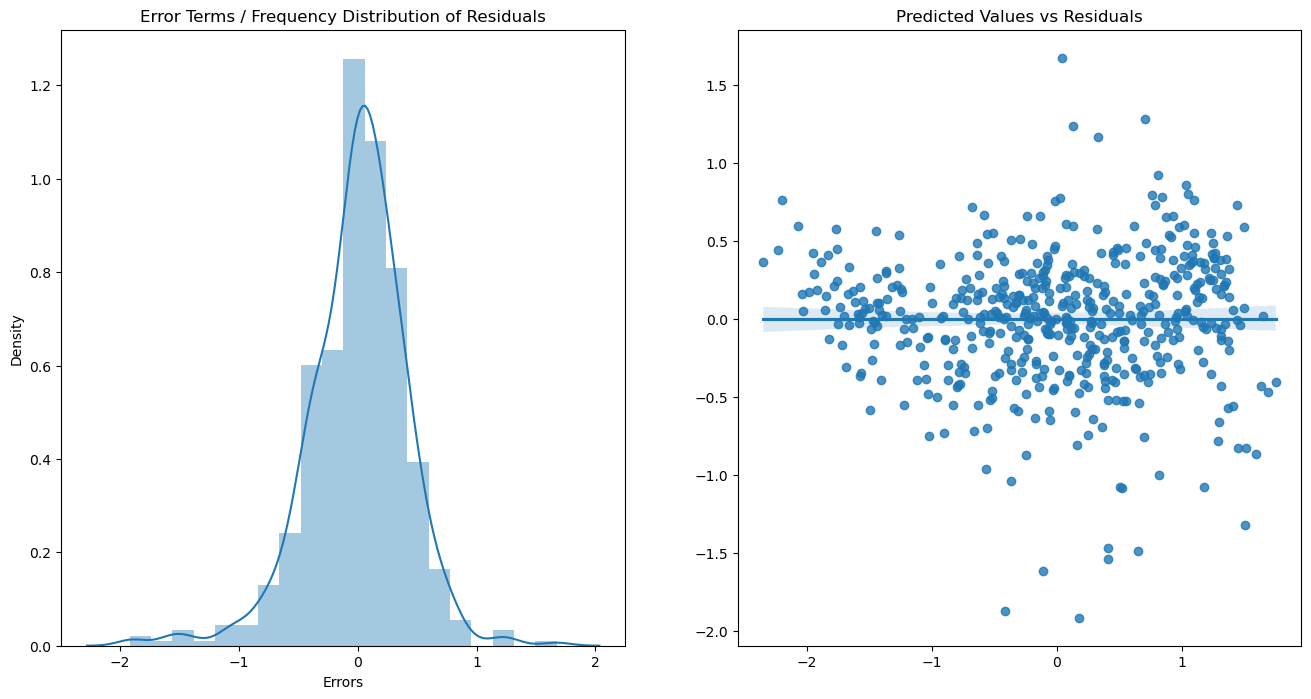

In [85]:
# Plot the histogram of the error terms
fig,ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)


ax[0].set(title='Error Terms / Frequency Distribution of Residuals')
sns.distplot((res), bins = 20, ax=ax[0])
ax[0].set(xlabel='Errors')

# predicted vs residuals
ax[1].set(title='Predicted Values vs Residuals')
sns.regplot(x=y_train_cnt,y=res,ax=ax[1])
plt.show()

In [86]:
#Checking columns
X_train_rfe_final.columns

Index(['const', 'yr', 'workingday', 'atemp', 'season_Spring', 'season_Winter',
       'mnth_July', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')

In [87]:
print(X_train_rfe_final.shape)
print(res.shape)

(510, 11)
(510,)


In [88]:
#Scaling the test data

num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [89]:
#Creating x and y sets

y_test = df_test.pop('cnt')
X_test = df_test

In [90]:
X_train_new = X_train_rfe_final.drop(['const'], axis=1)
cols=X_train_new.columns
cols

Index(['yr', 'workingday', 'atemp', 'season_Spring', 'season_Winter',
       'mnth_July', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')

In [91]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [92]:
X_train_rfe_final.columns

Index(['const', 'yr', 'workingday', 'atemp', 'season_Spring', 'season_Winter',
       'mnth_July', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')

In [93]:
#Making predictions on the chosen model

y_pred = lm_final.predict(X_test_new)

## Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

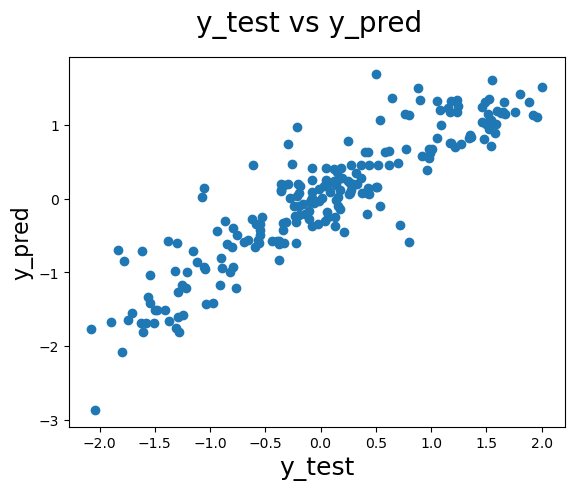

In [94]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

### We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

In [95]:
#Returns the mean squared error; we'll take a square root
print(mean_squared_error(y_test, y_pred))
np.sqrt(mean_squared_error(y_test, y_pred))


0.17409305043309387


0.41724459305435446

In [96]:
#Calculate the r square for test
r_squared = r2_score(y_test, y_pred)
round(r_squared,4)

0.8155

In [97]:
X_t=X_train_new.iloc[:,0].values

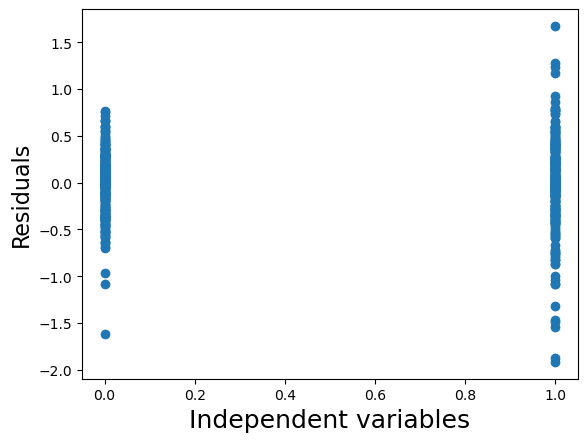

In [98]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

### When we have time series data (e.g. yearly data), then the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

In [99]:
X_train_new.head()

,yr,workingday,atemp,season_Spring,season_Winter,mnth_July,mnth_Sep,weekday_Saturday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
653,1,1,-0.055878,0,1,0,0,0,0,0
576,1,1,1.194106,0,0,1,0,0,0,0
426,1,0,-0.348834,1,0,0,0,1,0,1
728,1,0,-1.473492,1,0,0,0,0,0,0
482,1,0,-0.571474,0,0,0,0,1,0,1


In [100]:
print(X_train_rfe_final.columns)
print(lm_final.summary())

Index(['const', 'yr', 'workingday', 'atemp', 'season_Spring', 'season_Winter',
       'mnth_July', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.7
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          1.30e-182
Time:                        18:02:23   Log-Likelihood:                -277.04
No. Observations:                 510   AIC:                             576.1
Df Residuals:                     499   BIC:                             622.7
Df Model:                          10                                         
Covariance Type:            nonrobust         

In [101]:
round(lm_final.params,4)


const                                           -0.5070
yr                                               1.0441
workingday                                       0.2461
atemp                                            0.4630
season_Spring                                   -0.5160
season_Winter                                    0.2168
mnth_July                                       -0.2799
mnth_Sep                                         0.2823
weekday_Saturday                                 0.2858
weathersit_Light rain_Light snow_Thunderstorm   -1.3285
weathersit_Mist_cloudy                          -0.3636
dtype: float64

## We can see that the equation for best fitted line is:

### cnt = 0.2620 + 1.0441 X yr + 0.2461 X workingday + 0.4630 X atemp  -0.5160 X season_Spring + 0.2168 X season_Winter -0.2799 X mnth_July + 0.2823 X mnth_Sep + 0.2858 X weekday_Saturday - 1.3285 X weathersit_Light rain_Light snow_Thunderstorm - 0.3636 X weathersit_Mist_cloudy

In [102]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r_squared)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7883


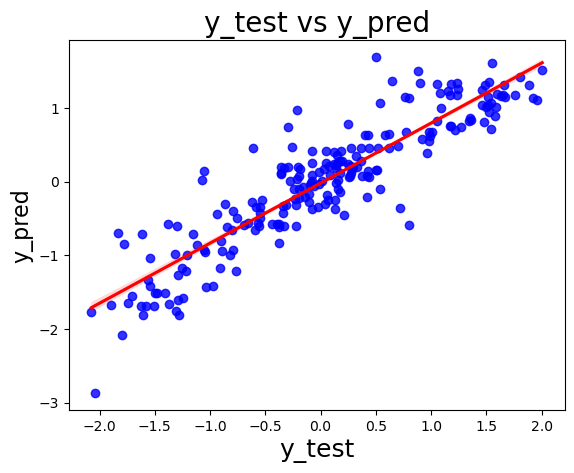

In [103]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

#### Checking the correlations using final pred variables

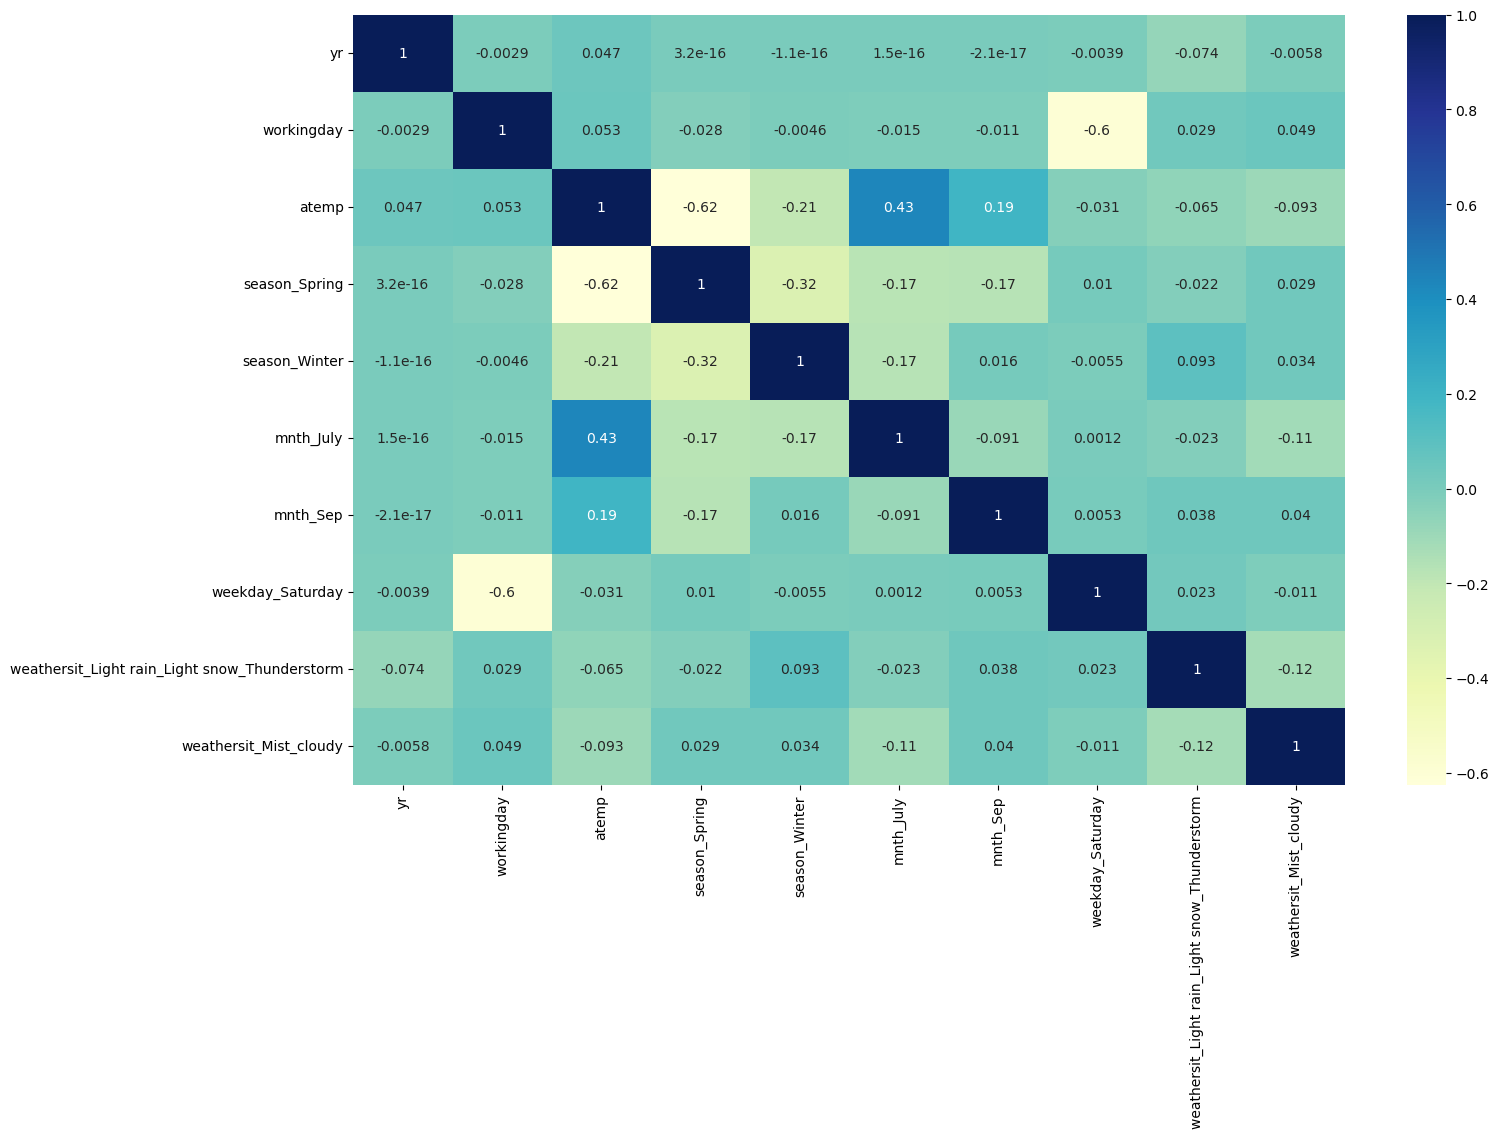

In [104]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_subset[cols].corr(), annot=True, cmap="YlGnBu")
plt.show()

## From HeartMap above, we can confirm that, overall we have a decent model.


## Comparision between Training and Testing dataset:

| **Item**              | **Train Data Set** | **Test Data Set** |
| ----------------- | -------------- | ------------- |
| R^2               |   0.826        | 0.8155        |
| Adjusted R^2      |   0.823        | 0.7883        |


Thus, for the final model with 10 variables, the r-squared on training and test data is about 82.6% and 81.55% respectively. The adjusted r-squared on the train set is about is about 82.3%.

<font color = green> <strong> Please Note : We could have considered Model 5, for simplicity and looks to be a decent model as well.</strong>